<a href="https://colab.research.google.com/github/aaugustine130/AdvLinearAlgebra/blob/master/Copy_of_Project_4_Case_2_Solving_for_a_unknown_function_using_data_and_Singular_Values_or_Best_Fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#  Libraries that we'll need:
import numpy as np
import sympy as sym
#from scipy import misc
from scipy import linalg
#from PIL import Image
#import imageio
import matplotlib.pyplot as plt
# importing "random" for random operations 
import random 

#  Singular Value Decomposition and Best Fit

We look at some data generated here from three sources:

*   Case 0:  A known polynomial function $f(x) = 4 - 3x^2 + 5x^6$
*   Case 1:  A known trigonometric function $f(x) = 4 - 2\cos(x) + \cos^2 (x)$
*   Case 2:  A matrix of data $M$ (specified below) with unknown source function
*   Case 3:  An interesting case.

# Overview for Case 2:  Best-fit polynomial of degree 3 from data of unknown source

In this situation, the data for the underlying function has already been gathered, and is stored in the matrix *givenData*.  This matrix contains two columns.  The first is an x-coordinate, and the second is an output value.

The data in the matrix came from an unknown underlying function $f(x)$.  So, if the 3rd row of the matrix is
$$ [ -1.2376094..., -3.448414068... ]$$
then it was generated from $$f(-1.2376094...) =  -3.448414068...$$

Your task in the project is to uncover the underlying function using the method of best-fit and SVD.

In [0]:
# The given data:

givenData = np.matrix([[-0.5089311944969932, -2.997008799965525], [3.327488211195128, -3453.7808944274257], [-1.237609470172906, -3.448414068353971], [2.2958559720851195, -189.2901607053327], [2.532411423046172, -418.96127216944654], [1.3405346345538653, 2.546491821468372], [0.10426496119492867, 0.7242241444032073], [1.873893206052621, -31.60154297604621], [-2.6209761598859194, 550.2765944168342], [-4.869993332193264, 57293.33257004533], [-2.79570102459193, 912.1837362481141], [3.1432036480386607, -2244.0036951744164], [-1.5085874374805952, 0.9480325600081159], [-3.256509676471614, 2935.0556185427467], [4.699243005535804, -44216.37934554891]])

# pull of the x-coordinates and the outputs from the data:
actual_data_x = givenData[:,0]   # first column of the matrix
actual_data_y = givenData[:,1]   # second column of the matrix

# 2.1  Setting up the system:

We have the data points for our system stored in **actual_data_x** and **actual_data_y**.  We'll use the data to set up a system
$$M \vec{x} = \vec{b}$$

where **actual_data_x** is used to populate matrix $M$ and **actual_data_y** is used to populate $\vec{b}$.

In [0]:
#Create the matrix M from the data in actual_data_x
M_entries = []

for i in actual_data_x:
  x = i[0,0]
  M_entries.append([1, x, x**2, x**3, x**4, x**5, x**6, x**7, x**8])

M = []
M = np.matrix(M_entries)


#and create the vector b from the data in actual_data_y:
b = []
b = actual_data_y

In [22]:
# Uncomment either line below to show the matrix M
# or the first five entries of b

M
#b[:5]

matrix([[ 1.00000000e+00, -5.08931194e-01,  2.59010961e-01,
         -1.31818758e-01,  6.70866778e-02, -3.41425031e-02,
          1.73761849e-02, -8.84328252e-03,  4.50062234e-03],
        [ 1.00000000e+00,  3.32748821e+00,  1.10721778e+01,
          3.68425411e+01,  1.22593121e+02,  4.07927165e+02,
          1.35737283e+03,  4.51664210e+03,  1.50290734e+04],
        [ 1.00000000e+00, -1.23760947e+00,  1.53167720e+00,
         -1.89561821e+00,  2.34603505e+00, -2.90347519e+00,
          3.59336839e+00, -4.44718675e+00,  5.50388044e+00],
        [ 1.00000000e+00,  2.29585597e+00,  5.27095464e+00,
          1.21013527e+01,  2.77829629e+01,  6.37856812e+01,
          1.46442737e+02,  3.36211433e+02,  7.71893026e+02],
        [ 1.00000000e+00,  2.53241142e+00,  6.41310762e+00,
          1.62406270e+01,  4.11279493e+01,  1.04152889e+02,
          2.63757965e+02,  6.67943683e+02,  1.69150821e+03],
        [ 1.00000000e+00,  1.34053463e+00,  1.79703311e+00,
          2.40898512e+00,  3.229327

#2.2:  Plot the generated system:

We'll create a plot showing the function (in red) and the data points sampled for the function (in blue).

To generate the graph of the function $f(x)$, we first use $100$ data points from $0$ to $99$, then compress them into an interval of width $6$, and shift it left so that the 100 data points are equally spaced between $x = -3$ and $x=3$.


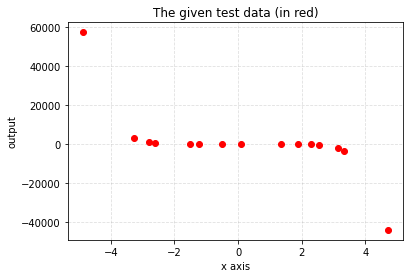

In [23]:
# Let's plot the data to see what it looks like:

# We'll specify that x is a variable:
x = sym.symbols('x')

#  Create the plot of the given data in as red points:
plt.plot(actual_data_x, actual_data_y, 'ro')

#Widen or restrict the output values to this range:
#You may have to adjust this to see more of the data points.
#plt.ylim(-30,30)

# Add a title
plt.title('The given test data (in red)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

#2.3:  Solving the system using the method of Best-Fit:

Given a system 
$$ M \vec{x} = \vec{b}$$

where matrix $M$ is **not necessarily square**, we can multiply by $M^T$ on the left to form the system

$$ \left( M^T M \right) \vec{x} = M^T \vec{b} $$

Now, $M^T M$ is a square matrix, so we can use it's inverse to solve for $\vec{x}$:

$$ \vec{x} = \left( M^T M \right)^{-1} M^T \vec{b}$$

This solution method is called the method of Best-Fit.

**A word of caution**:  We're initially trying to fit an 8th degree polynomial with 15 data points.  This might have a good solution...

In [24]:
#  Find the solution to Mx = b using Best Fit:
#  (We've already used 'x' as a variable, so we'll call the solution vector c.)
c = linalg.inv(M.transpose() * M) * M.transpose() * b
c

matrix([[-5.16649834e-10],
        [ 7.00000000e+00],
        [ 1.26760824e-09],
        [-5.00000000e+00],
        [-4.31867875e-10],
        [ 3.00000000e+00],
        [-1.62359015e-12],
        [-1.00000000e+00],
        [ 1.32249767e-12]])

We can test our solution against the output of our original system.

The original output in our system is represented by $\vec{b}$.

Our suggested solution to $M\vec{x} = \vec{b}$ is $\vec{c}$.  That is, we think

$$ M \vec{c} \approx \vec{b}$$

If we have a good fit, then 

$$\vec{b} - M \vec{c} \approx 0$$

To test our solution, we find the) magnitude of $\vec{b} - M\vec{c}$:

In [25]:
#  Let's see how close this actually gets us by comparing the original b vector to the result of Mc:
error = ((b-M*c).transpose() * (b-M*c))[0,0]
error**0.5

2.2667832650108537e-07

We can plot the actual solution (in red) with our best-fit solution (in green), using the test data shown as blue points.  It may be helpful to adjust the limits on the y-axis to zoom in or out on the output.

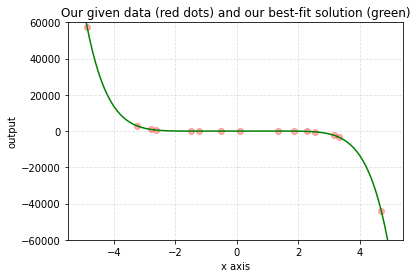

In [59]:
#Show a plot of the solutions using the best-fit method:

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-5, 5):
xdata = np.array(range(100))/(100/10) - 5

#Best fit method
best_fit = c[0,0] + c[1,0]*xdata + c[2,0]*(xdata**2) + c[3,0]*(xdata**3) + c[4,0]*(xdata**4) + c[5,0]*(xdata**5) + c[6,0]*(xdata**6) + c[7,0]*(xdata**7) + c[8,0]*(xdata**8)
#  Create the plot of the given data in as red points:
# and the best-fit method in green: 
plt.plot(actual_data_x,actual_data_y, 'ro', alpha=0.3 ) + plt.plot(xdata,best_fit, color='green')

#Widen or restrict the output values to this range:
#You may have to adjust this to see more of the data points.
plt.ylim(-60000,60000)

# Add a title
plt.title('Our given data (red dots) and our best-fit solution (green)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

#2.4 Solving the system using Singular Value Decomposition

Singular Value Decomposition decomposes a matrix M into three matrices

$$ M = U \Sigma V^\dagger$$

where $U$ and $V$ are square matrices and $\Sigma$ is a rectangular matrix with singular values on the main diagonal.

In [0]:
#  For this method, we use SVD on the data matrix M:
U, S, Vh = linalg.svd(M, full_matrices=True)

Vh = Vh.T

In [30]:
#  Uncomment the lines below to show the matrix U, S, and Vh:
#  Notice that in S only the singular values are stored, not the entire matrix.
#U
S
#Vh

array([3.97403909e+05, 7.97859095e+04, 1.18293135e+03, 3.74055839e+02,
       2.36940879e+01, 9.49223692e+00, 2.58180384e+00, 1.15621098e+00,
       9.27464467e-01])

In [31]:
#  The 2nd singular value is:
S[1]

79785.90945905783

In [32]:
# We can compare the original matrix M to the matrix reconstructed (called a1) from the SVD:
# If they are close, then allclose(M, a1) should be True.

#First, recast S as a matrix instead of a vector:
sigma = np.zeros((U.shape[1], Vh.shape[0]))
for i in range(min(sigma.shape)):
     sigma[i, i] = S[i]
#Reconstruct the matrix:
a1 = np.dot(U, np.dot(sigma, Vh.T))

#does a1 approximate M?
np.allclose(M, a1)

True

The SVD decomposition of matrix $M$ may have non-zero singular values in $\Sigma.  To solve
$$ M \vec{x} = \vec{b}$$

we can replace $M$ with $U \Sigma V^\dagger$:
$$ U \, \Sigma \, V^\dagger \, \vec{x} = \vec{b}$$

The inverse of matrices $U$ and $V$ are $U^\dagger$ and $V^\dagger$.  If we decompose $\Sigma$ into a block matrix composed of the non-zero singular values, then we can restrict our singular value decomposition into invertible and non-invertible parts:

$$ U \, \Sigma \, V^\dagger = \left( \begin{array}{c|c} U_{use} & U_{discard} \\ \end{array} \right) \left( \begin{array}{c|c} \Sigma_{use} & 0 \\ \hline 0 & \Sigma_{discard} \\ \end{array} \right)  \left( \begin{array}{c|c} V_{use} & V_{discard} \\ \end{array} \right)^\dagger$$

Effectively, this allows us to replace $U \Sigma V^\dagger \vec{x} = \vec{b}$ with

$$ U_{use} \, \Sigma_{use} \, V_{use}^\dagger \, \vec{x} = \vec{b}$$

The solution to this system is then

$$\vec{x} = V_{use} \, \Sigma_{use}^{-1} \, U_{use}^\dagger \, \vec{b}$$


In [0]:
#  Based on the number of non-zero singular values in S, divide each of U, sigma, and Vh into 
#  U_use, Sigma_use, and Vh_use.
#  and  discard U_d, Sigma_d, Vh_d
useSigs = 8

#Use these parts of U, S, and Vh
(Vrows, Vcols) = Vh.shape
(Urows, Ucols) = U.shape
U_use = U[:Urows, :useSigs]
Vh_use = Vh[:Vrows, :useSigs]
sigma_use = sigma[:useSigs, :useSigs]

#discard these parts of U, S, and Vh:
U_d = U[:Urows, useSigs:]
Vh_d = Vh[:Vrows, useSigs:]
sigma_d = sigma[useSigs:, useSigs:]

In [47]:
#  We should be able to figure out the size of U and Vh that we'll use:
#
#  U S Vh  =   [         .     ] [             .         ]  [            .      ]
#              [ U_use   .     ] [  sigma_use  .         ]  [   Vh_use   .      ]
#              [         . U_d ] [.......................]  [            . Vh_d ]
#              [         .     ] [             . sigma_d ]  [            .      ]
#
#
#  Uncomment these lines (one at a time) to check that U_use, sigma_use, and Vh_use are the right sizes, as well as U_d, sigma_d, and Vh_d
U_use.shape
#sigma_use.shape
#Vh_use.shape
#U_d.shape
#sigma_d.shape
#Vh_d.shape

(15, 8)

In [48]:
#  If we use Singular Value Decomposition to break down M as a product of matrices
#  M = U sigma Vh.conjugate_transpose()
#  Then the part of A which corresponds to non-zero singular values is:
#  M_use = U_use sigma_use Vh_use.conjugate_transpose()
#
#  So, the equation Mx = b becomes:  (U_use sigma_use Vh_use.conjugate_transpose()) x = b
#  or
#  svd_sol = (U_use sigma_use Vh_use.conjugate_transpose()).inverse() b
#  or
#  svd_sol = Vh_use * Sigma_use.inverse() * U_use.transpose() * b
#  (since Vh_use.conjugate_transpose() = Vh_use.inverse() and U_use.transpose() = U_use.inverse() )
svdsol = (Vh_use @ linalg.inv(sigma_use) @ U_use.transpose()) @ b
svdsol

matrix([[-6.62679070e-01],
        [ 6.87921977e+00],
        [ 7.02456477e-01],
        [-4.97459275e+00],
        [-1.69847921e-01],
        [ 2.99854422e+00],
        [ 1.39928906e-02],
        [-9.99996849e-01],
        [-3.43146604e-04]])

We can test our solution against the output of our original system.

The original output in our system is represented by $\vec{b}$.

Our suggested solution to $M\vec{x} = \vec{b}$ is $\vec{svdsol}$.  That is, we think

$$ M \vec{svdsol} \approx \vec{b}$$

If we have a good fit, then 

$$\vec{b} - M \vec{svdsol} \approx 0$$

To test our solution, we find the) magnitude of $\vec{b} - M\vec{svdsol}$:

In [49]:
#  Let's see how close this actually gets us by comparing the original b vector to the result of Mc:
error = ((b-M*svdsol).transpose() * (b-M*svdsol))[0,0]
error**0.5

0.9166748386775093

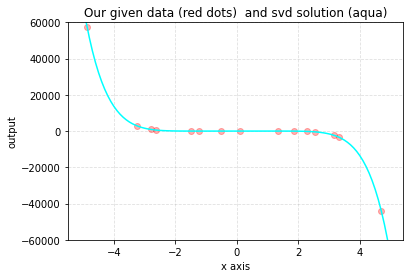

In [60]:
#Show a plot of the solutions using the SVD method:

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-5, 5):
xdata = np.array(range(100))/(100/10) - 5

#construct the solution from svdsol
svd_fit = svdsol[0,0] + svdsol[1,0]*xdata + svdsol[2,0]*(xdata**2) + svdsol[3,0]*(xdata**3) + svdsol[4,0]*(xdata**4) + svdsol[5,0]*(xdata**5) + svdsol[6,0]*(xdata**6) + svdsol[7,0]*(xdata**7) + svdsol[8,0]*(xdata**8)
#  Create the plot of the given data in as red points:
# and the svd solution in aqua:  
plt.plot(actual_data_x,actual_data_y, 'ro', alpha=0.3 ) + plt.plot(xdata,svd_fit, color='aqua')

#Widen or restrict the output values to this range:
#You may have to adjust this to see more of the data points.
plt.ylim(-60000,60000)

# Add a title
plt.title('Our given data (red dots)  and svd solution (aqua)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')


#2.5  Assignment

The problems above utilized a 2nd degree polynomial to fit the given data.  To complete this assignment, you need to



1.   Modify the code above to utilize an 8th degree polynomial for both the best-fit and SVD methods
2.   Write out the polynomial used to generate the original given data.
3.   Broaden the output on the graphs above and below in order to see all fifteen data points.


The graph below should show both the best-fit and svd solution:

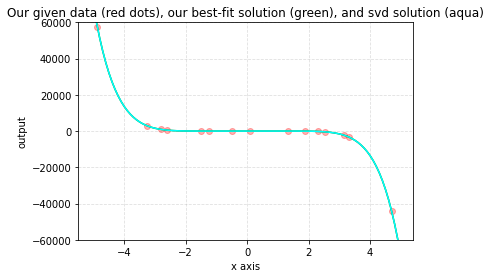

In [58]:
#Show a plot of the solutions using the best-fit method, and the SVD method:

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-5, 5):
xdata = np.array(range(100))/(100/10) - 5

#Best fit method
best_fit = best_fit = c[0,0] + c[1,0]*xdata + c[2,0]*(xdata**2) + c[3,0]*(xdata**3) + c[4,0]*(xdata**4) + c[5,0]*(xdata**5) + c[6,0]*(xdata**6) + c[7,0]*(xdata**7) + c[8,0]*(xdata**8)

#construct the solution from svdsol
svd_fit = svdsol[0,0] + svdsol[1,0]*xdata + svdsol[2,0]*(xdata**2) + svdsol[3,0]*(xdata**3) + svdsol[4,0]*(xdata**4) + svdsol[5,0]*(xdata**5) + svdsol[6,0]*(xdata**6) + svdsol[7,0]*(xdata**7) + svdsol[8,0]*(xdata**8)

#  Create the plot of the given data in as red points:
#  the best-fit method in green, and the svd solution in aqua:  
plt.plot(actual_data_x,actual_data_y, 'ro', alpha=0.3 ) + plt.plot(xdata,best_fit, color='green') + plt.plot(xdata,svd_fit, color='aqua')

#Widen or restrict the output values to this range:
#You may have to adjust this to see more of the data points.
plt.ylim(-60000,60000)

# Add a title
plt.title('Our given data (red dots), our best-fit solution (green), and svd solution (aqua)')
# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

In [61]:
c

matrix([[-5.16649834e-10],
        [ 7.00000000e+00],
        [ 1.26760824e-09],
        [-5.00000000e+00],
        [-4.31867875e-10],
        [ 3.00000000e+00],
        [-1.62359015e-12],
        [-1.00000000e+00],
        [ 1.32249767e-12]])

Polynomial used to generate the data: $f(x) = 7x - 5x^3 + 3x^5 - x^7$